In [39]:
# Teo Tze Shuen
# S10204885
# Diploma in Accountancy
# TA24

In [40]:
# TODO - project requirements
# 1.    Create non-visual or visual plots to inspect each categorical and numeric field.
# 2.    Identify potential data quality issues including data types.
# 3.	Clean up the data for the issues identified.
# 4.	Perform further data exploration on the cleaned data to uncover any interesting insight(s) using any two visual plots of your choice. (1/2)

#5. check that it all works on google colab

# IDEAS in progress: Boxplot all numerical data to figure out outliers (upper+lower fence)

In [41]:
# TODO - Values requiring cleaning
# 1. purchase value (Truncate 0-400) // DONE
# 2. Age (Missing Values)

In [42]:
# import relevant libraries - note i'm doing this first in VScode (for faster IntelliSense & version control)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [43]:
# other misc stuff related to libraries
sns.set_theme(style='white')

In [44]:
df = pd.read_excel('Fraud_Data_Final.xlsx')
df.info() #check data imports sucessfully & get info on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  object 
 3   source          151112 non-null  object 
 4   browser         151112 non-null  object 
 5   sex             151112 non-null  object 
 6   age             144546 non-null  float64
 7   ip_address      151112 non-null  float64
 8   days            151112 non-null  int64  
 9   is_fraud        151112 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 11.5+ MB


In [45]:
print(df.isnull().mean() * 100) #use isnull with mean to check for pct(%) of missing values in columns
print(len(df.index))

user_id           0.000000
purchase_value    0.000000
device_id         0.000000
source            0.000000
browser           0.000000
sex               0.000000
age               4.345121
ip_address        0.000000
days              0.000000
is_fraud          0.000000
dtype: float64
151112


In [46]:
# age has  around 4.35% of the total values missing- as such we can remove the rows with missing values if necessary (under 5%)
# we can create a copy of the dataframe to be a cleaned version with all the necessary data cleaning applied to it:

In [60]:
df_clean = df.copy()
df_clean = df_clean.dropna(axis=0, how='any') # copy df & drop rows with missing values
print(df_clean.isnull().sum()) # check that df_clean has no missing values
print(len(df_clean.index))

user_id           0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
days              0
is_fraud          0
dtype: int64
144546


In [61]:
# great, now we have a dataset with no missing values
# I will still use the main 'df' DataFrame as it contains more values, but when dealing with age I will use 'df_rm'

<AxesSubplot:>

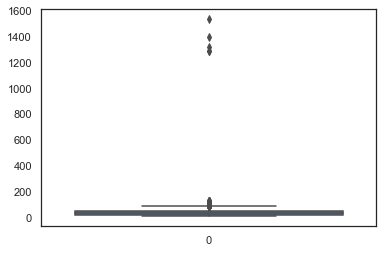

In [62]:
#plot a boxplot to see the distribution and quartiles of the purchase values.
sns.boxplot(data=df['purchase_value'])

In [63]:
# massive outliers here - dictionary says value should be capped at 400, so we will hard cap the value at that and remove outliers.
# copy df to df_im, with the condition to remove rows in which purchase value is over 400.
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
df_clean = df_clean[~(df_clean['purchase_value'] >= 400)]


<AxesSubplot:>

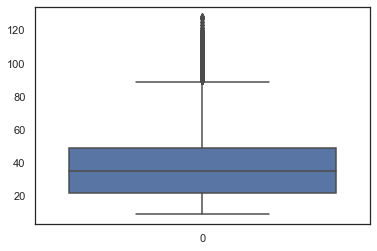

In [64]:
# replot the boxplot to check that we've removed outlier values.
sns.boxplot(data=df_clean['purchase_value'])

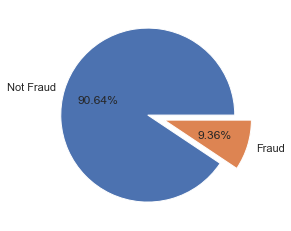

In [65]:
# Looks like we've removed the outlier data successfully - now, onto other data.
# The most notable data is the is_fraud value, which will help us with our data exploration later
# Draw piechart to determine percentage of fraud cases in dataset
val = df.is_fraud.value_counts()
pie, ax = plt.subplots()
explode = (0, 0.2) #explode second slice
labels = ('Not Fraud','Fraud') #Add Labels

ax.pie(val.values, explode=explode, autopct='%.2f%%',labels=labels)
plt.show()

In [66]:
# Around 9.36% of cases are fraud

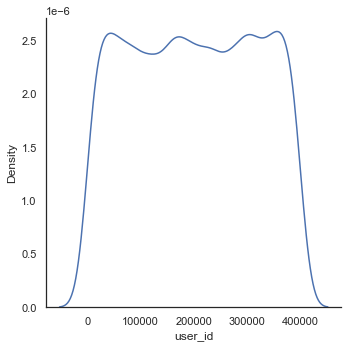

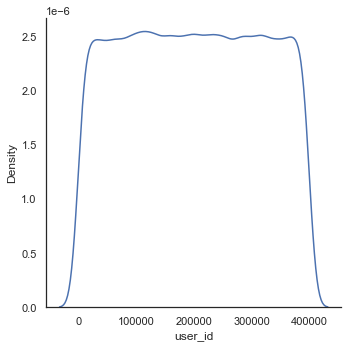

In [67]:
sns.displot(df[df['is_fraud']==1]['user_id'], kind='kde')
sns.displot(df[df['is_fraud']==0]['user_id'], kind='kde')
#lol wtf is this

<AxesSubplot:xlabel='browser', ylabel='count'>

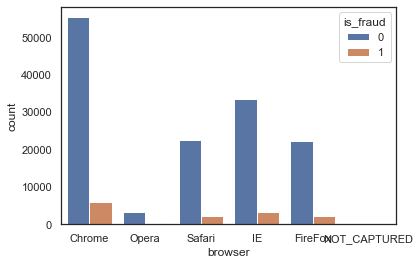

In [68]:
sns.countplot(data=df, x='browser', hue='is_fraud')

In [69]:
# We can try to plot 2 histograms with the fraud vs non fraud data vs concentration of purchase price - 
# it's possible that fraud purchases could be more or less expensive, showing a skew

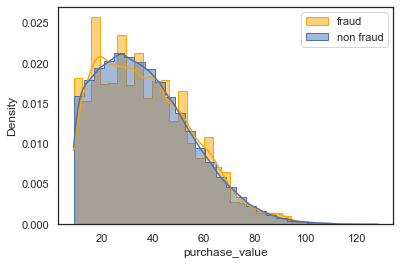

In [70]:
# Deleted the old, non-regex way which involved splitting the data into 2 dfs. This is cleaner

# Plotted in seaborn. I prefer how it looks. - https://seaborn.pydata.org/generated/seaborn.histplot.html
# Done with regex - https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/

# A few comments on the params passed
# bins=30 - we choose a lower bin value so that the histogram is less 'spotty', won't affect kde anyways
# stat='density' - This normalizes the areas of both hisotgrams to 1, making them directly comparable
#           - (pct(%) or probability would result in the non fraud hist being notably smaller.) 
# kde - kernel density emulation helps us build an easily readable smoothed probabiltiy line, making the skew easy to see
# log_scale - the raw data is extremely skewed so logaritmic scaling helps make the significant data take up more space along the x-axis.
sns.histplot(df_clean[df_clean['is_fraud']==1]['purchase_value'], bins=30, stat='density', kde=True, element="step", label = 'fraud', color="Orange")
sns.histplot(df_clean[df_clean['is_fraud']==0]['purchase_value'], bins=30, stat='density', kde=True,  element="step", label = 'non fraud')
plt.legend()
plt.show()

In [71]:
# we can see that the distribution of purchase value for fraud and non fraud cases both have similar distribution curves,
# therefore, purchase value is inconclusive to test for fraudulent cases

# Another possibility is the time (in the df, 'days') of the purchase. It's possible that the fradulent cases have a different skew in purchase time

<AxesSubplot:xlabel='days', ylabel='Probability'>

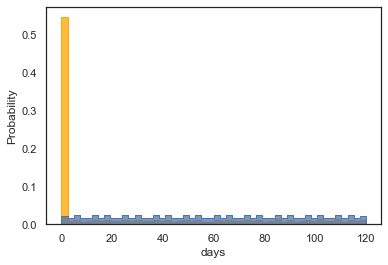

In [72]:
sns.histplot(df[df['is_fraud']==1]['days'],bins=50, stat='probability',color="Orange", element="step")
sns.histplot(df[df['is_fraud']==0]['days'],bins=50, stat='probability', element="step")